In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Creating the data to be used along this notebook

The data created follows the line Y = 3X + 4 and have some noise around it.

---

Criando os dados a serem usados neste notebook

Os dados criados seguem a linha Y = 3X + 4 e possuem algum ruído ao redor.

In [2]:
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

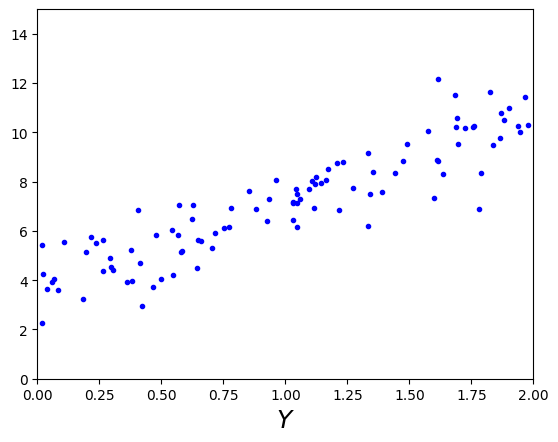

In [3]:
plt.plot(X, Y, 'b.')
plt.xlabel("$X$", fontsize = 18)
plt.xlabel("$Y$", rotation = 0, fontsize = 18)
_ = plt.axis([0, 2, 0, 15])

This first approach uses the linear algebra module inside numpy to try the first aproximate result.
The np.linalg tranform the data in a matriz and uses the inverse of it to calculate melhor_theta, which is the first attempt to find the two parameters of the equation.

As we can see below, the first results are pretty much close of the real values. But this process can be improved wich other algorithms.

---

Esta primeira abordagem usa o módulo de álgebra linear dentro do numpy para tentar o primeiro resultado aproximado.
O np.linalg transforma os dados em uma matriz e usa o inverso dele para calcular melhor_theta, que é a primeira tentativa de encontrar os dois parâmetros da equação.

Como podemos ver abaixo, os primeiros resultados estão bem próximos dos valores reais. Mas este processo pode ser melhorado com outros algoritmos.

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
melhor_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

melhor_theta

array([[3.6560021 ],
       [3.50487128]])

In [5]:
X_novo = np.array([[0], [2]])
X_novo_b = np.c_[np.ones((2, 1)), X_novo]
y_previsto = X_novo_b.dot(melhor_theta)
y_previsto

array([[ 3.6560021 ],
       [10.66574466]])

Plotting the first results:

As we can see, the linear approach for this dataset is close enough of the real values of the data.

---

Traçando os primeiros resultados:

Como podemos ver, a abordagem linear para este conjunto de dados está próxima o suficiente dos valores reais dos dados.

(0.0, 2.0, 0.0, 15.0)

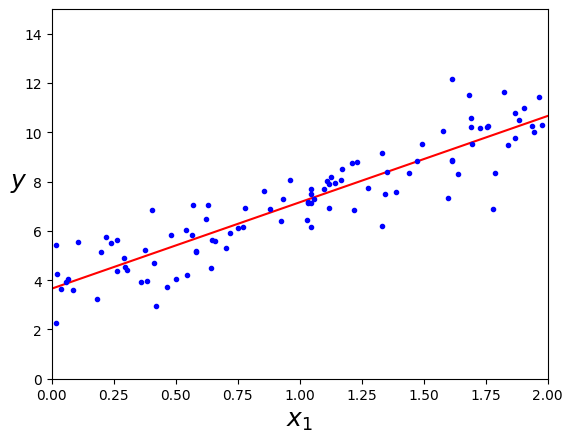

In [6]:
plt.plot(X_novo, y_previsto, 'r-')
plt.plot(X, Y, 'b.')
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])

Here are the first implementation of the custo function as a sum of squared errors divided by 1/2m, as m is the amount of data in our dataset

---

Aqui está a primeira implementação da função de custo como uma soma de erros ao quadrado dividida por 1/2m, pois m é a quantidade de dados em nosso conjunto de dados

In [7]:
def funcao_custo(teta, x, y):
    
    m = len(y)

    valores_previstos = x.dot(teta)
    custo = (1/(2*m)) * np.sum(np.square(valores_previstos - y))

    return custo

Here we have the gradient descent actually implemented.
As we can see, the algorithm uses two "historical arrays". This is to keep track of the changes in our values of teta as it follows the mathematical description.

The teta value is our guess about the first parameter, which means it calculates the sloop of the graph.

The parameters of the function are X and Y (our data), teta (the value to be tested and enhanced), the learning rate (or the alpha in most descriptions of the formula) and the number of iterations. The learning rate can be discussed further more in other oportunity, but for now we are using a standard value of 0.01 (as it need to be between 0 and 1, without the limits)

---

Aqui temos o gradiente descendente realmente implementado.
Como podemos ver, o algoritmo usa dois "arrays históricos". Isso é para acompanhar as mudanças em nossos valores de teta, uma vez que segue a descrição matemática.

O valor teta é o nosso palpite sobre o primeiro parâmetro, o que significa que ele calcula o sloop do gráfico.

Os parâmetros da função são X e Y (nossos dados), teta (o valor a ser testado e aprimorado), a taxa de aprendizado (ou o alfa na maioria das descrições da fórmula) e o número de iterações. A taxa de aprendizado pode ser discutida mais detalhadamente em outra oportunidade, mas por enquanto estamos usando um valor padrão de 0,01 (pois ele precisa estar entre 0 e 1, sem os limites)

In [8]:
def gradient_descent(x, y, teta, learning_rate = 0.01, iterations = 100):
    
    m = len(y)
    custo_historico = np.zeros(iterations)
    teta_historico = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(x, teta)

        teta = teta - (1/m)* learning_rate * (x.T.dot((prediction - y)))
        teta_historico[it, :] = teta.T
        custo_historico[it] = funcao_custo(teta, x, y)

    return teta, custo_historico, teta_historico

Now using the gradient descent implemented above, we'll try to find the new values for theta0 (the slope of the function) and theta1 (the intercept). And we can calculate the custo function to this model.

And as we can see, the values are pretty much close of the actual values, as the final custo is small enough.

---

Agora, usando o gradiente descendente implementado acima, tentaremos encontrar os novos valores para theta0 (a inclinação da função) e theta1 (a interceptação). E podemos calcular a função de custo para este modelo.

E como podemos ver, os valores estão bem próximos dos valores reais, já que o custo final é pequeno o suficiente.

In [9]:
lr = 0.01
n_iter = 1000

teta = np.random.randn(2, 1)

x_b = np.c_[np.ones((len(X), 1)), X]
teta, custo_historico, teta_historico = gradient_descent(X_b, Y, teta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(teta[0][0],teta[1][0]))
print('Custo final/MSE:  {:0.3f}'.format(custo_historico[-1]))

Theta0:          3.553,
Theta1:          3.593
Custo final/MSE:  0.460


In the following graphs, we can see the value of custo function in each iteraction for the algorithm. For each iteraction, the value of teta are reajusted to a new value with more proximity with the actual value.

And after +-200 iteractions, the custo function stabilizes at the lowest point, which indicates that this value is the best value for our function. Because of this, we don't need 1000 iteractions as we tried before. With 200 iteractions we achieve our desired optimal value.

---

Nos gráficos a seguir, podemos ver o valor da função custo em cada iteração para o algoritmo. Para cada iteração, o valor de teta é reajustado para um novo valor com maior proximidade com o valor real.

E após +-200 iterações, a função custo estabiliza no ponto mais baixo, o que indica que esse valor é o melhor valor para nossa função. Por causa disso, não precisamos de 1.000 iterações como tentamos antes. Com 200 iterações, alcançamos nosso valor ideal desejado.

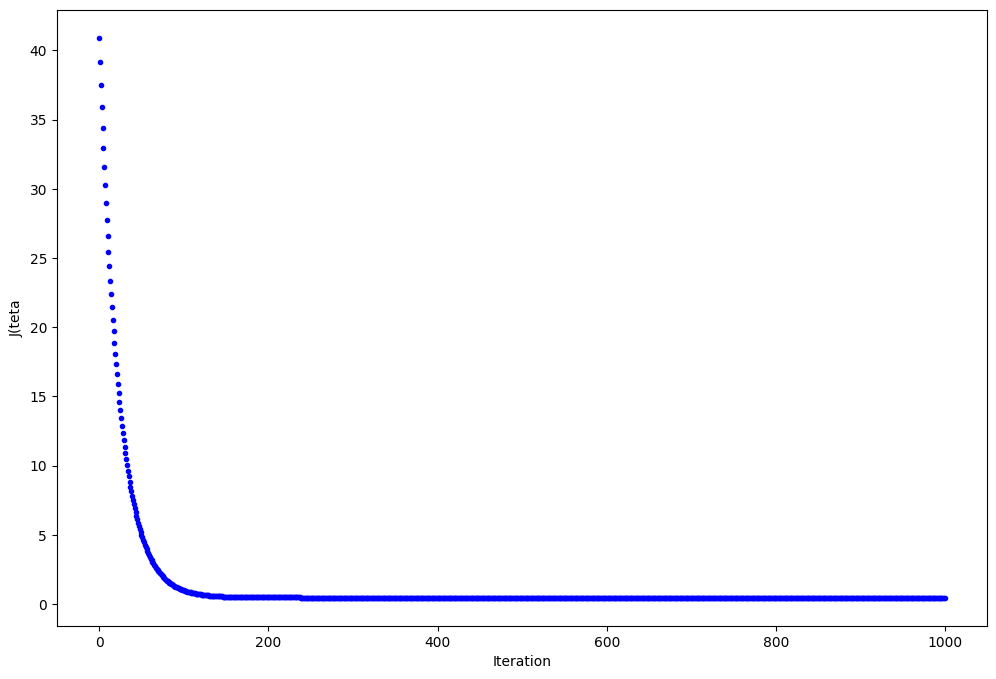

In [10]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.set_ylabel('J(teta')
ax.set_xlabel('Iteration')
_ = ax.plot(range(n_iter), custo_historico, 'b.')

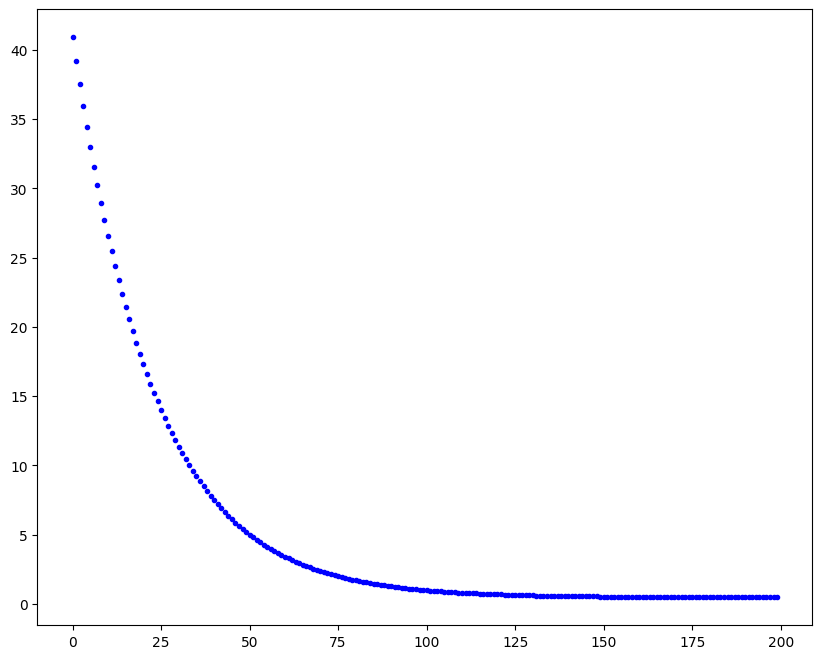

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.plot(range(200),custo_historico[:200],'b.')

To complete this study on gradient descent, we'll plot the graphs for the various values of theta0 and theta1 to compare. Each pair of values create a linear approach that starts at the bottom of the graph and keep growing and reaching the ideal value as the number of iteractions grow up.

The first graph shows that the first atempts create values with great discrepancy, wich results in large steps towards the true values. But, as this true value approach, the steps keep getting smaller and smaller until it converges in our optimal value.

---

Para completar este estudo sobre gradiente descendente, vamos traçar os gráficos para os vários valores de theta0 e theta1 para comparar. Cada par de valores cria uma abordagem linear que começa na parte inferior do gráfico e continua crescendo e atingindo o valor ideal à medida que o número de iterações aumenta.

O primeiro gráfico mostra que as primeiras tentativas criam valores com grande discrepância, o que resulta em grandes passos em direção aos valores verdadeiros. Mas, como essa abordagem de valor real, as etapas ficam cada vez menores até convergir em nosso valor ideal.

In [12]:
def plot_GD(n_iter, lr, ax, ax1 = None):
    _ = ax.plot(X, Y, 'b.')
    teta = np.random.randn(2, 1)

    tr = 0.1
    custo_historico = np.zeros(n_iter)
    
    for i in range(n_iter):
        pred_prev = X_b.dot(teta)
        teta, h, _ = gradient_descent(X_b, Y, teta, lr, 1)
        pred = X_b.dot(teta)

        custo_historico[i] = h[0]

        if ((i % 25 == 0)):
            _ = ax.plot(X, pred, 'r-', alpha = tr)

            if tr < 0.8:
                tr = tr + 0.2

    if not ax1 == None:
        _ = ax1.plot(range(n_iter), custo_historico, 'b-')

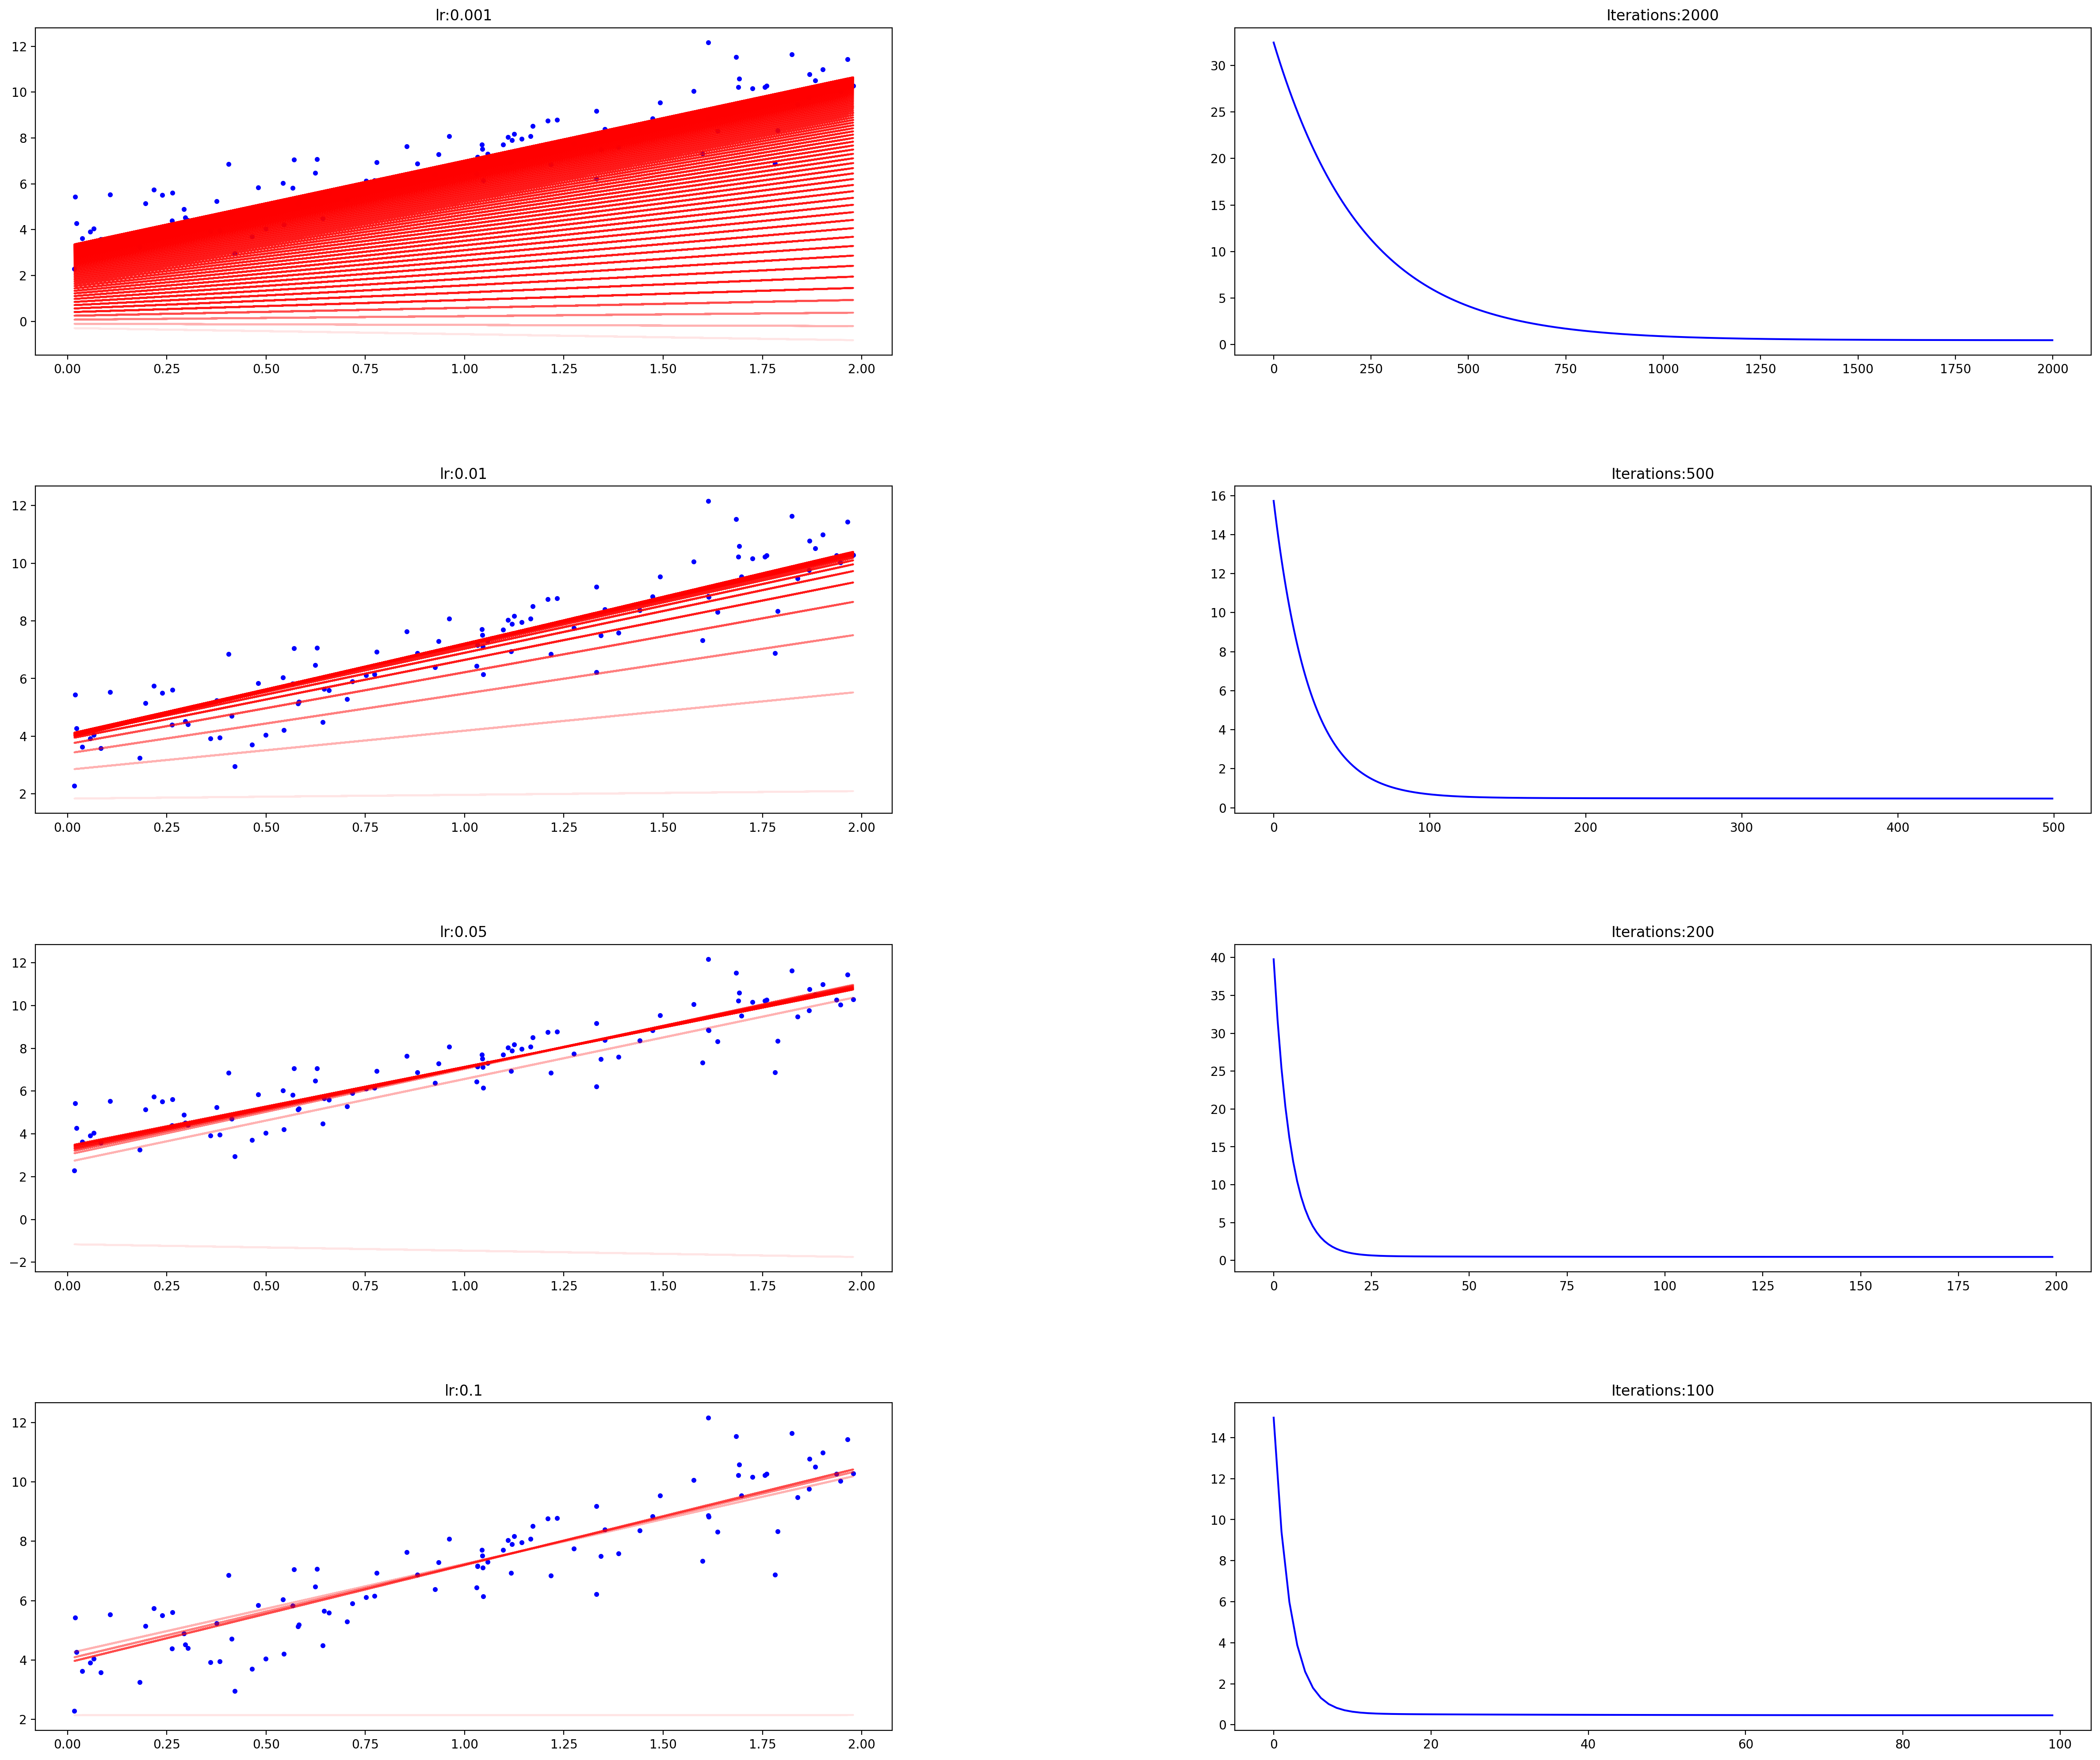

In [13]:
fig = plt.figure(figsize = (30, 25), dpi = 200)
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

it_lr = [(2000, 0.001), (500, 0.01), (200, 0.05), (100, 0.1)]

count = 0

for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4, 2, count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)